In [ ]:
import tensorflow as tf

In [ ]:
#Create a “scalar” tensor (a tensor with no “axes”)
x1 = tf.constant(5) # dtype=int32 (default)
print(x1) # Display x1

tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
#Create a “vector” tensor (a tensor has 1-axis):
x2 = tf.constant([1.0, 2.0, 6.0]) # dtype= float32
print(x2) # Display x2

tf.Tensor([1. 2. 6.], shape=(3,), dtype=float32)


In [ ]:
#Create a “maxtrix” tensor (a tensor has 2-axes)
x3 = tf.constant([[1, 8],
                  [2, 5],
                  [4, 4]],
                  dtype=tf.float64)
print(x3) # Display x3

tf.Tensor(
[[1. 8.]
 [2. 5.]
 [4. 4.]], shape=(3, 2), dtype=float64)


In [ ]:
#Create a 3-axes tensor with shape: [3, 2, 4]
x4 = tf.constant ([[[1, 1, 2, 2],
                    [3, 3, 4, 4]],
                    [[5, 5, 6, 6],
                    [7, 7, 8, 8]],
                    [[9, 9, 0, 0],
                    [1, 1, 3, 3]],])
print(x4) # Display x4

tf.Tensor(
[[[1 1 2 2]
  [3 3 4 4]]

 [[5 5 6 6]
  [7 7 8 8]]

 [[9 9 0 0]
  [1 1 3 3]]], shape=(3, 2, 4), dtype=int32)


In [ ]:
#using Tensorflow to present the mathematical formula Y = (a + b)/(a-b).

a = tf.constant(4, name='a')  # a = 4
b = tf.constant(2, name='b')  # b = 2
c = tf.add (a, b, name='c')  # a + b
d = tf.subtract (a, b, name='c')  # a - b
Y = tf.divide (c, d, name='Y')  # c/d
print("Y =", Y) # Display Y

Y = tf.Tensor(3.0, shape=(), dtype=float64)


Basic TensorFlow Operations

In [ ]:
import numpy as np  # import Numpy library
import tensorflow as tf  # import TensorFlow library
# check if Eager Execution is activated
print("Eager Execution is activated: {}".format(tf.executing_eagerly()))

Eager Execution is activated: True


In [ ]:
a = tf.constant(3)    # create a constant tensor with value of 3
b = tf.constant(4)    # create a constant tensor with value of 4
# display Tensor values
print("a = {}".format(a))
print("b = {}".format(b))

a = 3
b = 4


In [ ]:
print(a)    # shape=() means “a” is a scalar, and dtype=int32 means “a” is an integer.
print(b)    # shape=() means “b” is a scalar, and dtype=int32 means “b” is an integer.

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [ ]:
c = a + b
print("a + b = {}".format(c))    # show the result of a+b
d = a * b
print("a * b = {}".format(d))    # show the result of a*b

a + b = 7
a * b = 12


In [ ]:
# Create a 2D Tensor whose dtype is float32
a = tf.constant([[1., 2.], [3., 4.]], dtype=tf.float32)
# Create a 2D Numpy array whose dtype is float32
b = np.array([[1., 0.], [2., 3.]], dtype=np.float32)
print("a constant: {}D Tensor".format(a.ndim))

c = a + b
print("a + b = \n{}".format(c))    # Display the result of a+b
# tf.matmul is matrix multiplication
d = tf.matmul(a, b)
print("a * b = \n{}".format(d))    # Display the result of a*b

a constant: 2D Tensor
a + b = 
[[2. 2.]
 [5. 7.]]
a * b = 
[[ 5.  6.]
 [11. 12.]]


In [ ]:
print(c)
print("NumpyArray:\n {}".format(c.numpy()))

tf.Tensor(
[[2. 2.]
 [5. 7.]], shape=(2, 2), dtype=float32)
NumpyArray:
 [[2. 2.]
 [5. 7.]]


Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

The first method: Using “keras.Sequential“APT in Keras

In [ ]:
# Create a Sequential model
model = keras.Sequential(name='Sequential')
# Each time model.add adds a layer to the network, the first layer needs to define the input size.
model.add(layers.Dense(64, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
# The last layer will be regarded as the output layer of the model
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The second method: Using “tf.keras.Sequential” API in TensorFolow2.0

In [ ]:
# all the network layers in a list and use them as parameters of tf.keras.Sequential
# And this list is also sequential, the first one needs to define the input size, and the last one is the output layer
model = tf.keras.Sequential([layers.Dense(64, activation='relu', input_shape=(784,)),
                       layers.Dense(64, activation='relu'),
                       layers.Dense(10, activation='softmax')])

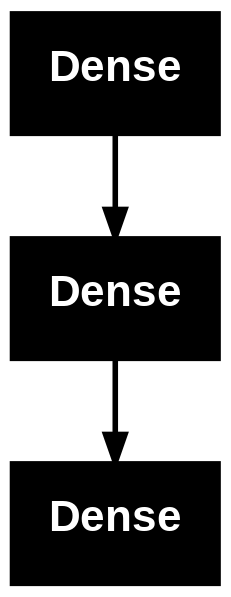

In [ ]:
# Generate network topology.
plot_model(model, to_file='Sequential_Model.png')

# Show the network topology.
Image('Sequential_Model.png')

Functional API

1 Single Input and Output Network

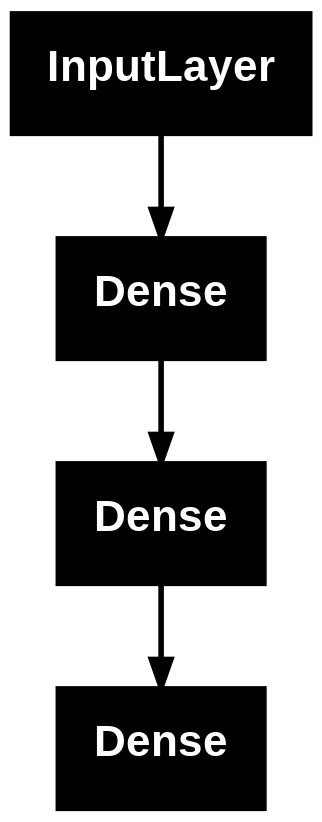

In [ ]:
# Step1: Defining input layer
inputs = keras.Input(shape=(784,), name='Input')

#Step2: Connecting layers
#Hidden layers
hidden1 = layers.Dense(64, activation='relu', name='hidden1')(inputs)
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(hidden1)

#Output layers
outputs = layers.Dense(10, activation='softmax', name='Output')(hidden2)

# Step 3: Creating network model
model = keras.Model(inputs=inputs, outputs=outputs)

# plot model
plot_model(model, to_file='Functional_API_Sample_Model.png')

# show model
Image('Functional_API_Sample_Model.png')

2 Multiple Inputs and single output model

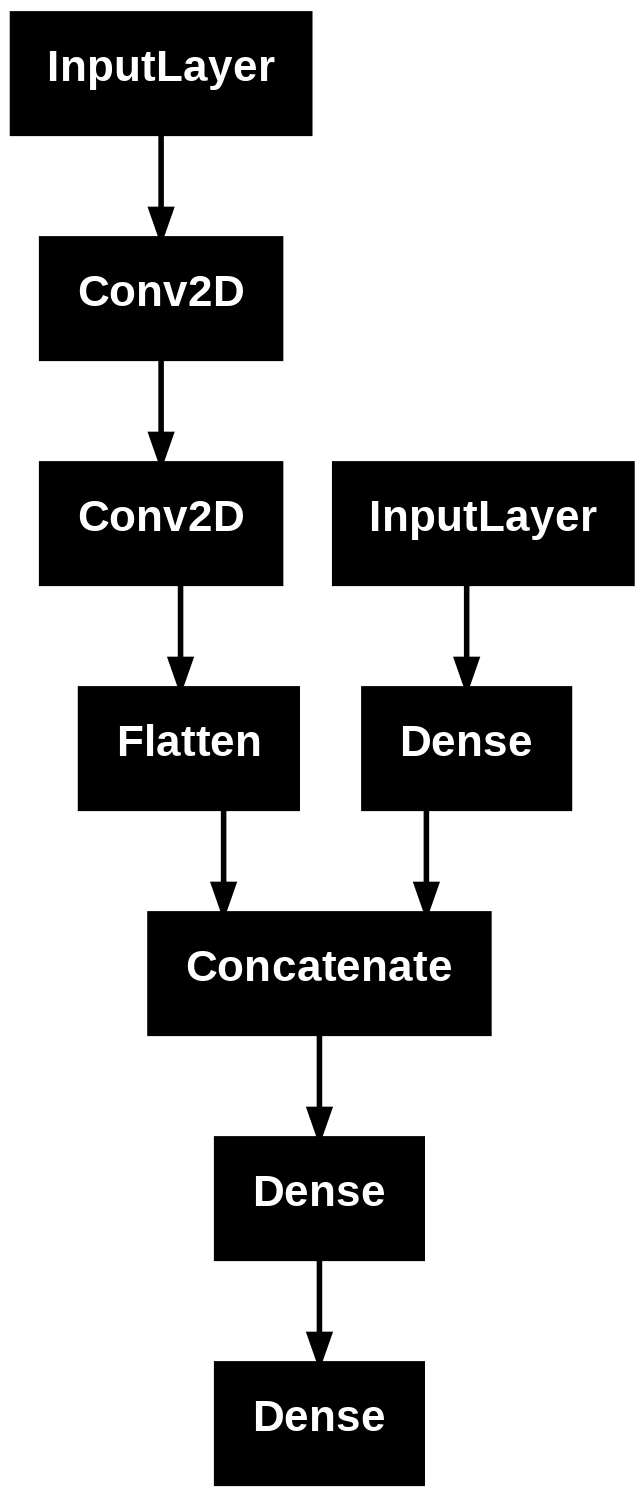

In [ ]:
# Step1: Defining Input layers
img_input = keras.Input(shape=(28, 28, 1), name='Image_Input')
info_input = keras.Input(shape=(1, ), name='Information_Input')

# Step 2: connecting layers
#Hidden layers

hidden1_1 = layers.Conv2D(64, kernel_size=5, strides=2, activation='relu', name='hidden1_1')(img_input)
hidden1_2 = layers.Conv2D(32, kernel_size=5, strides=2, activation='relu', name='hidden1_2')(hidden1_1)
hidden1_2_ft= layers.Flatten()(hidden1_2)
hidden1_3 = layers.Dense(64, activation='relu', name='hidden1_3')(info_input)
concat = layers.Concatenate()([hidden1_2_ft, hidden1_3])
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(concat)

# Output layer
outputs = layers.Dense(1, name='Output')(hidden2)

# Step 3: Creating network model
model = keras.Model(inputs=[img_input, info_input], outputs=outputs)

# plot model
plot_model(model, to_file='Functional_API_Multi_Input_Model.png')

# show model
Image('Functional_API_Multi_Input_Model.png')

3 Single input and multiple outputs Model

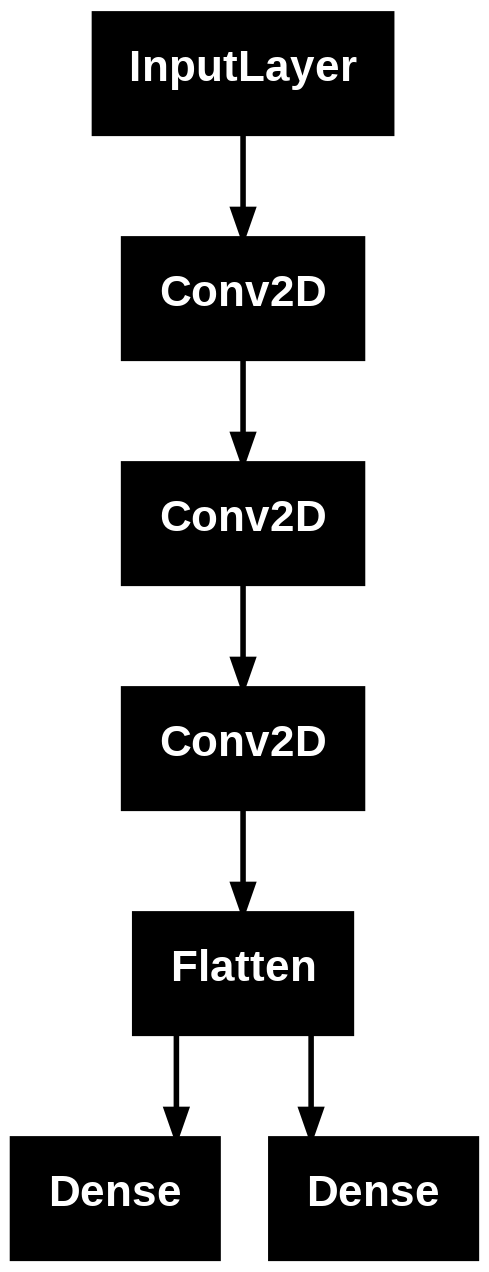

In [ ]:
# Step1: Defining Input layers
inputs = keras.Input(shape=(28, 28, 1), name='Input')

#Step 2: connecting layers
# Hidden layers
hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden1')(inputs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden2')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden3')(hidden2)
flatten = layers.Flatten()(hidden3) # flattening

# Output layers
age_output = layers.Dense(1, name='Age_Output')(flatten)
gender_output = layers.Dense(1, name='Gender_Output')(flatten)

# Step 3: Creating network model
model = keras.Model(inputs=inputs, outputs=[age_output, gender_output])

# plot model
plot_model(model, to_file='Functional_API_Multi_Output_Model.png')

# show model
Image('Functional_API_Multi_Output_Model.png')

4 Multiple Inputs and Multiple Outputs Network

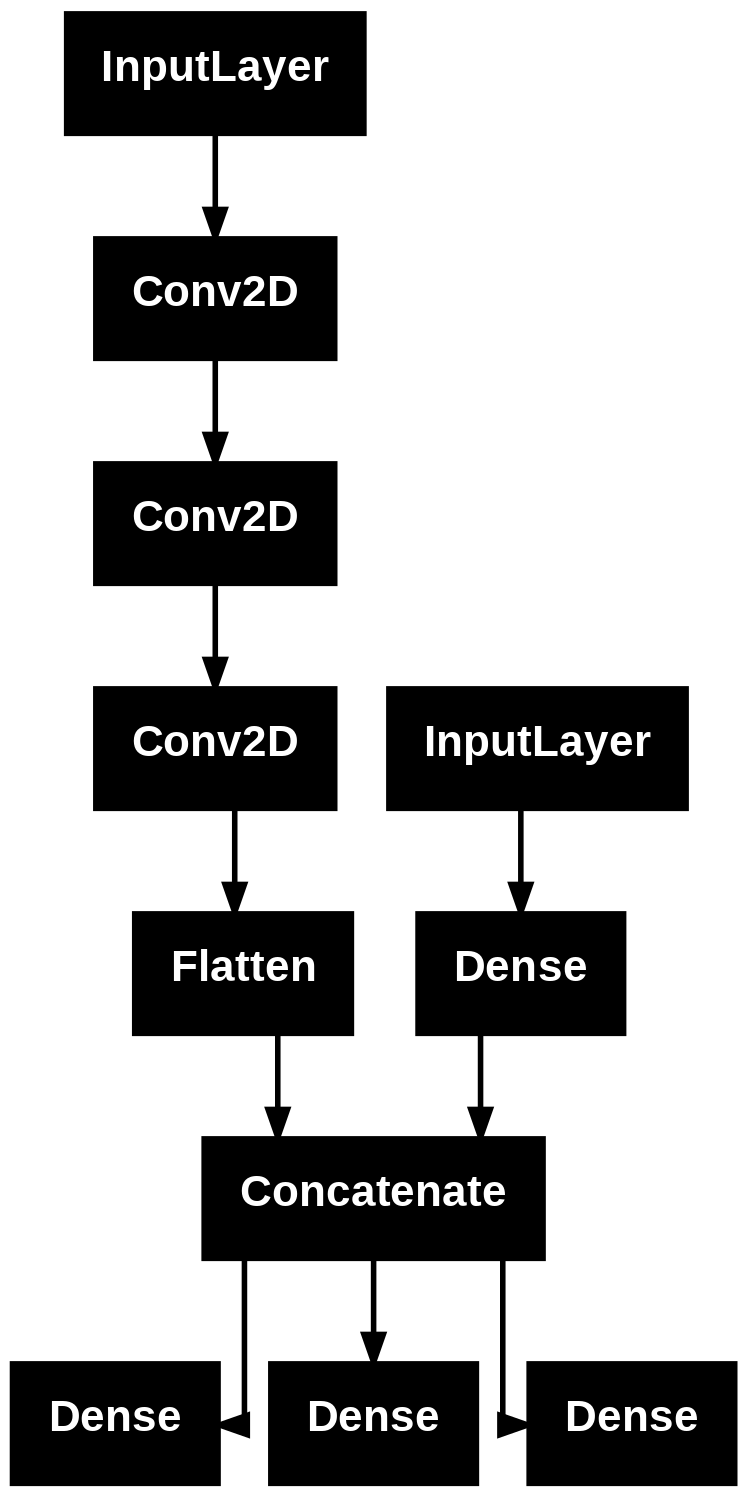

In [ ]:
# Step1: Defining Input layers
image_inputs = keras.Input(shape=(28, 28, 1), name='Image_Input')
info_inputs = keras.Input(shape=(10, ), name='Info_Input')

#Step 2: connecting layers
#Hidden layers

hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden1')(image_inputs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden2')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden3')(hidden2)
flatten = layers.Flatten()(hidden3)

# Dense layer
hidden4 = layers.Dense(64)(info_inputs)

concat = layers.Concatenate()([flatten, hidden4])

# Output layers
weather_outputs = layers.Dense(1, name='Output1')(concat)
temp_outputs = layers.Dense(1, name='Output2')(concat)
humidity_outputs = layers.Dense(1, name='Output3')(concat)

# Step 3: Creating network model
model = keras.Model(inputs=[image_inputs, info_inputs],
                    outputs=[weather_outputs, temp_outputs, humidity_outputs])

# plot mode
plot_model(model, to_file='Functional_API_Multi_Input_Multi_Output_Model.png')

# show model
Image('Functional_API_Multi_Input_Multi_Output_Model.png')

tf.data
Basic Functions of tf.data API

1.tf.data.Dataset.from_tensors: creating dataset with single element.


In [ ]:
dataset = tf.data.Dataset.from_tensors(tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], shape=(10, )))
print(dataset)

<_TensorDataset element_spec=TensorSpec(shape=(10,), dtype=tf.int32, name=None)>


2.tf.data.Dataset.from_tensor_slices: creating a dataset that whose elements are slices of tensors.

In [ ]:
x_data = tf.data.Dataset.from_tensor_slices(tf.constant([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], shape=(10, )))
print(x_data)

y_data = tf.data.Dataset.from_tensor_slices(tf.constant([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], shape=(10, )))
print(y_data)

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>


3.for loop

In [ ]:
for data in dataset:
    print(data)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [ ]:
for data1, data2 in zip(x_data, y_data):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


4.take：creating a dataset with count elements from the source dataset

In [ ]:
for data in dataset:
    print(data)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [ ]:
for data1, data2 in zip(x_data.take(5), y_data.take(5)):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8


In [ ]:
for data1, data2 in zip(x_data.take(12), y_data.take(12)):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


5.tf.data.Dataset.zip

In [ ]:
dataset = tf.data.Dataset.zip((x_data, y_data))
print(dataset)

<_ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>


6.map：transformation of data by using a specified function.

In [ ]:
tf.data.Dataset.range(10).map(lambda x: x*2)

<_MapDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

7.Naming: the samples from dataset can be named

In [ ]:
x = tf.data.Dataset.range(10)
y = tf.data.Dataset.range(10).map(lambda x: x*2)

dataset = tf.data.Dataset.zip({"x": x, "y": y})
print(dataset)

<_ZipDataset element_spec={'x': TensorSpec(shape=(), dtype=tf.int64, name=None), 'y': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [ ]:
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


Set a size for each batch

In [ ]:
dataset = tf.data.Dataset.zip({"x": x, "y": y}).batch(2)

for data in dataset.take(5):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [0 1], y: [0 2]
x: [2 3], y: [4 6]
x: [4 5], y: [ 8 10]
x: [6 7], y: [12 14]
x: [8 9], y: [16 18]


9.shuffle：Randomly shuffling the elements of the dataset. A buffer is filled with “buffer_size” elements, then these elements in this buffer are randomly sampled, the selected elements are replaced with new elements.

In [ ]:
dataset = dataset.shuffle(10)
for data in dataset.take(5):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [6 7], y: [12 14]
x: [2 3], y: [4 6]
x: [8 9], y: [16 18]
x: [4 5], y: [ 8 10]
x: [0 1], y: [0 2]


10.repeat：After finishing reading all the samples from a dataset, no samples can be read unless a “repeat” function is used. Setting repeat(n) allows n times dataset to be repeated.

In [ ]:
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))


print('-' * 50)
dataset = dataset.repeat(2)
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [2 3], y: [4 6]
x: [6 7], y: [12 14]
x: [4 5], y: [ 8 10]
x: [0 1], y: [0 2]
x: [8 9], y: [16 18]
--------------------------------------------------
x: [8 9], y: [16 18]
x: [0 1], y: [0 2]
x: [2 3], y: [4 6]
x: [4 5], y: [ 8 10]
x: [6 7], y: [12 14]
x: [6 7], y: [12 14]
x: [2 3], y: [4 6]
x: [0 1], y: [0 2]
x: [8 9], y: [16 18]
x: [4 5], y: [ 8 10]
